# Homework set 2

Please **submit this Jupyter notebook through Canvas** no later than **Thursday November 14**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Job Marcelis, 14000946

Ernani Hazbolatow, 

Run the following cell to import NumPy, Matplotlib and some other functions.

In [1]:
import math
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

---

# Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


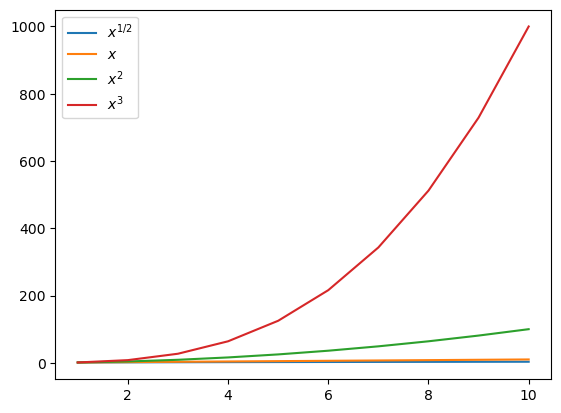

In [2]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

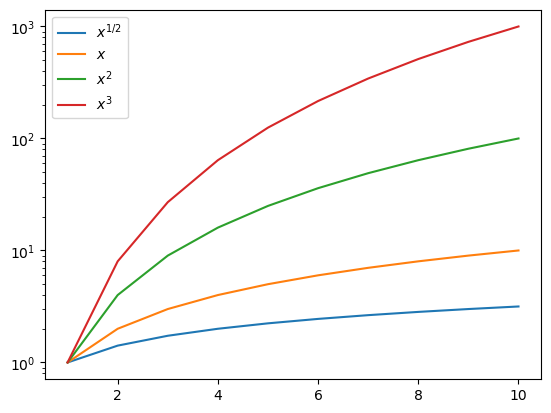

In [3]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


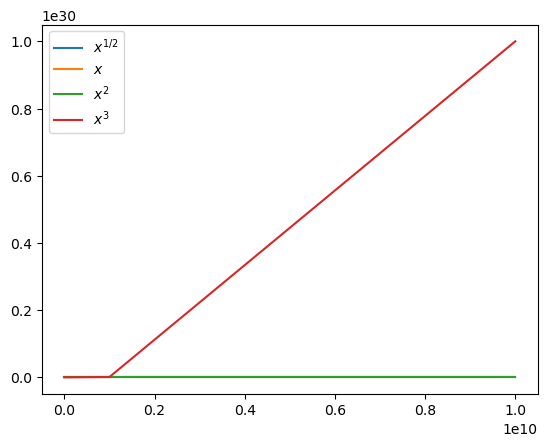

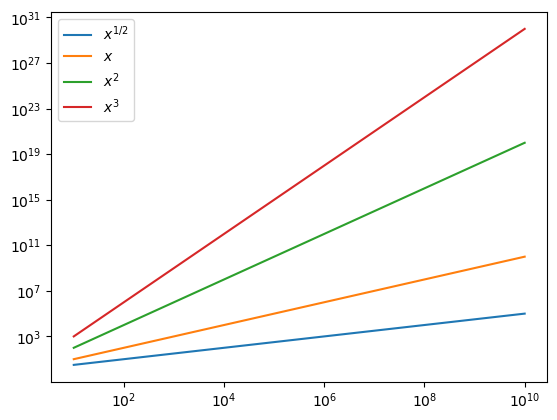

In [4]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

## Plots of arbitrary curves in the $(x,y)$ plane

So far, in all our plots, $y$ was a function of $x$. But this is not the only possibility. One can draw arbitrary curves in the $(x,y)$ plane. Next are two examples

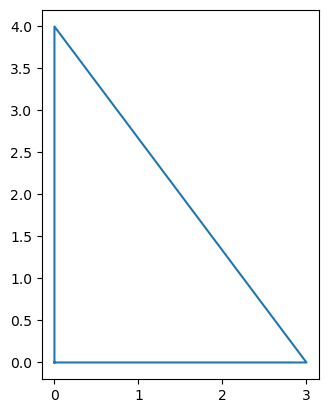

In [5]:
# plot a triangle
x = [0, 3, 0, 0]
y = [0, 0, 4, 0]
plt.plot(x,y)
# set aspect ratio to one
plt.gca().set_aspect('equal')

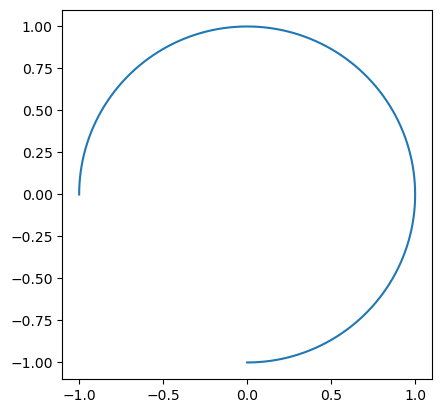

In [6]:
# we plot three quarters of a circle from (0,-1) going counter clockwise to (-1,0)
t = np.linspace(-0.5*np.pi, np.pi, 271)
x = np.cos(t)    
y = np.sin(t)
plt.plot(x,y)
# set the aspectratio to 1 so that it truely looks like a circle
plt.gca().set_aspect('equal')

---

# Exercise 1

Show that the Gram–Schmidt orthogonalization of an $m \times m$ matrix requires approximately $m^3$ multiplications and $m^3$ additions.


First, the vector projection is defined as $\text{proj}_{\bm{u}}(\mathbf{v}) = \frac{\langle \mathbf{v}, \mathbf{u}\rangle}{\langle \mathbf{u}, \mathbf{u}\rangle} \mathbf{u}$ where $\langle \cdot, \cdot \rangle$ is the inner product `[1]`. 

Each step in `[1]` has the following operations:
* $\langle \mathbf{v}, \mathbf{u}\rangle = (v_1u_1) + (v_2u_2) + ... + (v_mu_m)$ `[2]` is $m$ multiplications and $m-1$ additions
* $\langle \mathbf{u}, \mathbf{u}\rangle = (u_1u_1) + (u_2u_2) + ... + (u_mu_m)$ `[3]` is $m$ multiplications and $m-1$ additions. 
* A single division is performed between `[2]` and `[3]`
* Multiplication by $\mathbf{u}$ is $m$ multiplications `[4]`

We compute $\langle \mathbf{u}, \mathbf{u}\rangle$ once per vector, effectively reducing the operation for each vector $\mathbf{u}$ once.

We tally the operations as follows: 
* Number of multiplications: `[2]` + `[3]` + `[4]` = $=2m+1$
* Number of additions: `[2]` + `[3]` $=2(m-1)$

For $m$ vectors, the Gram-Schmidt orthogonalization defines the projection vector as follows:
$$
\mathbf{u}_1 = \mathbf{v}_1 \\
\mathbf{u}_2 = \mathbf{v}_2 - \text{proj}_{\bm{u_1}}(\mathbf{v_2}) \\
\mathbf{u}_3 = \mathbf{v}_3 - \text{proj}_{\bm{u_1}}(\mathbf{v_3}) - \text{proj}_{\bm{u_2}}(\mathbf{v_3})  \\
\mathbf{u}_k = \mathbf{v}_v -  \sum_{j=1}^{m-1}\text{proj}_{\bm{u_j}}(\mathbf{v_k})
$$
Thus, the total number of projections is given by $1+2+3+...+(m-1)=\frac{(m-1)m}{2}$ `[5]`. We apply these to get our final counts:
* Number of multiplications: `[2]` + `[3]` * `[5]` = $=2m+1\frac{(m-1)m}{2} = m(m+1)(m-1)\approx m^3$
* Number of additions: `[2]` + `[3]` * `[5]` $=2(m-1)\frac{(m-1)m}{2} = m(m-1)(m-1) \approx m^3$



-----
# Exercise 2
We want to reconstruct a function $s(t)$ (also called the signal in this exercise), $t \in [0,1]$, from data given by
$$d(t) = \int_0^1 s(t) \, dt + \text{noise}.$$
We assume the data is given at $n$ equally space time points $t_j = j h$, $h = \frac{1}{n}$, $j=1,2, \ldots, n$. The data is therefore a vector $d = [d_1, \ldots, d_n]$, where $d_j$ denotes the value at $t_j$. 
The signal $s$ is to be reconstructed at time points 
$t_{j-1/2} = (j-1/2)h$ for $j = 1,2, \ldots, n$. It is described by a vector $s = [s_1, \ldots, s_n]$ with $s_j$ the value at $t_{j-1/2}$.
Numerical integration is described in Chapter 8 of the book by Heath. Using the composite midpoint rule, the vectors $s$ and $d$ are related by
$$d = A \cdot s + \text{noise}$$
where
$$A = \begin{bmatrix} 
h & 0 & 0 & \ldots & 0 \\
h & h & 0 & \ldots & 0 \\
h & h & h & \ddots &  \vdots \\
\vdots & \vdots & \ddots & \ddots & 0 \\
h & h & \ldots & h  & h 
\end{bmatrix}.$$


## (a)
As a test signal we take
$$s_{\rm true}(t) = \left\{
\begin{array}{ll} 
1 & \text{if $0.05 \le |t-1/2|<0.15$}\\
0.7 & \text{if $|t-1/2|<0.05$}\\
0 & \text{otherwise} \end{array} 
\right. .$$ 
Generate data $d_0$ without noise and data $d_\epsilon$ with noise, where the noise is normally distributed, with mean zero and standard deviation $\epsilon = 0.005$.
Take for example $n=100$. Plot the data.

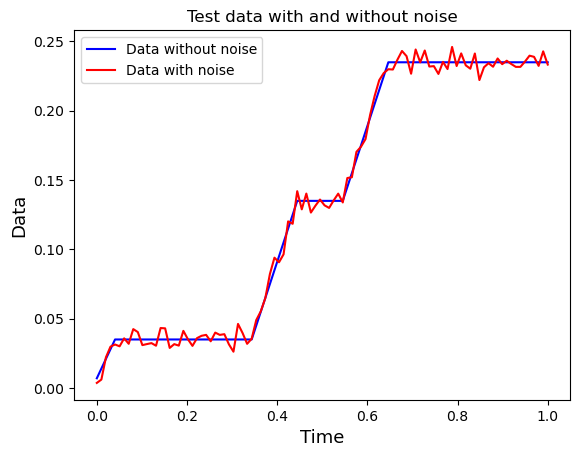

In [7]:
n = 100
h = 1/n
time = np.linspace(0, 1, n)
s = np.zeros(n)
A = np.tril(np.ones((n, n))) * h

for i in range(n):
    if np.abs(time[i] - 0.5) >= 0.05 and np.abs(time[i] - 0.5) < 0.15:
        s[i] = 1
    elif np.abs(time[i] < 0.05):
        s[i] = 0.7
    else:
        s[i] = 0
        
d_0 = A @ s
noise = np.random.normal(0, 0.005, n)
d_eps = d_0 + noise

plt.plot(time, d_0, color='blue', label='Data without noise')
plt.plot(time, d_eps, color='red', label='Data with noise')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Data', fontsize=13)
plt.legend()
plt.title('Test data with and without noise')
plt.show()

## (b)
Try to determine $s$ from $d_0$ by inverting the matrix $A$, ignoring the noise term.
Do the same with $d_\epsilon$ instead of $d_0$. Plot the results. What do you observe about the errors in the inversion?

You may use a library routine for matrix inversion/solving a linear system.

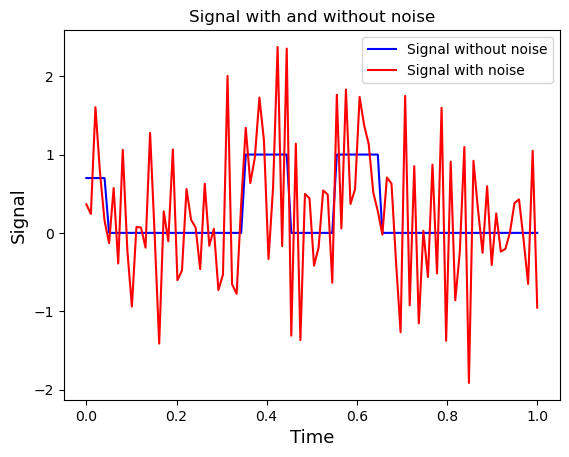

In [8]:
A_inv = np.linalg.inv(A)
s_0 = A_inv @ d_0
s_eps = A_inv @ d_eps

plt.plot(time, s_0, color='blue', label='Signal without noise')
plt.plot(time, s_eps, color='red', label='Signal with noise')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Signal', fontsize=13)
plt.legend()
plt.title('Signal with and without noise')
plt.show()

We observe that the reconstructed $s$ with the noise contains large deviations from the the $s$ without noise. 

If we calculate the matrix norm of A, which is the maximum absolute row sum, we get 1. Calculating the matrix norm of the inverse of A, we get 200. This means that the condition number is: $cond(A) = ||A||\times ||A^{-1}|| = 1 * 200 = 200$. A large condition number implies that small errors get blown up. This is exactly why the deviations are so large.

## (c)
One way to address the issue just observed is by truncated SVD regularization. Suppose $A = U \Sigma V^T$ is the singular value decomposition of $A$. 

Express the inverse $A^{-1}$ in terms of $U, V$ and $\Sigma$, or in terms of $U$, $V$ and the singular values.

Let $k$ be some integer less or equal than $n$. Denote by $B_k$ the matrix that is obtained from $A$ by setting the smallest $n-k$ singular values to zero (and keeping $U$, $V$ and the first $k$ singular values the same). 

In truncated SVD regularization, an estimate for $s$ is obtained by applying the pseudoinverse $B_k^{+}$ to the data (instead of the true inverse $A^{-1}$) (see section 3.6 of Heath). Try truncated SVD regularization for various values of $k$. Show that for certain values of $k$ the result obtained by truncated SVD regularization is a "better" approximation of the true signal than the result obtained by the true inverse $A^{-1}$.
Note that better can mean different things, it can mean "visually better" or "quantitatively better" in some norm to be specified, try to be precise in what you write down.

What happens if you choose $k$ too small?

You may use library routines to compute the SVD.

Text answer:

We know that the matrices $U$ and $V$ are orthogonal, which implies $UU^T = U^TU = I$ (same for $V$). This means that their transposes are their inverses. We also know for the inverse of a product AB, that this equals the product of inverses in reverse order, i.e. $(AB)^{-1} = B^{-1}A^{-1}$.

We can use the above facts to express $A^{-1}$ in terms of $U$, $V$, and $\Sigma$, namely:

$A^{-1} = (U\Sigma V^T)^{-1} = V\Sigma^{-1}U^T$.


In [9]:
def pseudo_inv(U, S, V, k):
    S_trunc_inv = np.zeros((n, n))
    S_trunc_inv[:k, :k] = np.diag(1/S[:k])
    pseudo_inv_B = V.T @ S_trunc_inv @ U.T
    return pseudo_inv_B

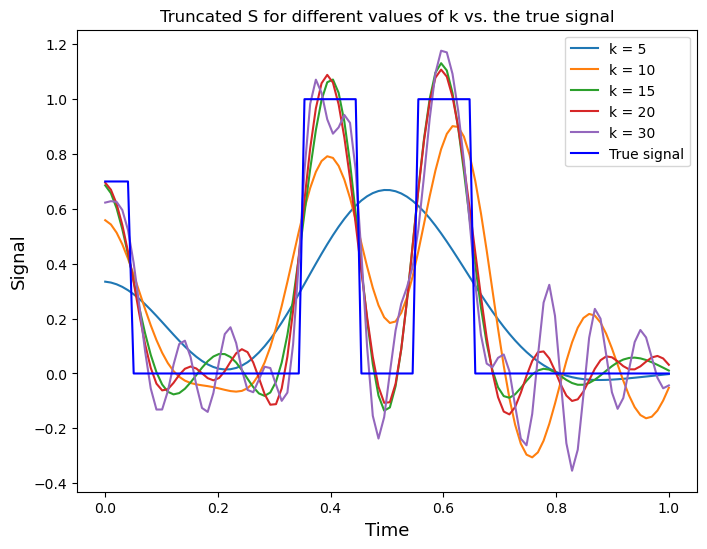

In [10]:
k_list = [5, 10, 15, 20, 30]
U, S, Vt = np.linalg.svd(A)

plt.figure(figsize=(8,6))
for i in k_list:
    s_trunc = pseudo_inv(U, S, Vt, i) @ d_eps
    plt.plot(time, s_trunc, label=f'k = {i}')
plt.plot(time, s_0, color='blue', label='True signal')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Signal', fontsize=13)
plt.title('Truncated S for different values of k vs. the true signal')
plt.legend()
plt.show()

We can visually see that there is a "sweet spot" for $k$ that describes the signal the best. For $k \rightarrow 100$, we get the signal we saw in ex. b. For small values of $k$, to many dimensions get lost and the signal cannot be properly reconstructed anymore. This is observed in the above plot for $k=5$.

To find the best $k$ quantitatively, we could calculate the error between the true signal and truncated result and minimize that error. This is done in the cell below:

In [11]:
errors = []
for i in range(1, 100):
    s_trunc = pseudo_inv(U, S, Vt, i) @ d_eps
    MSE = np.mean(np.square(s_0 - s_trunc)) # MSE: mean squared error.
    errors.append(MSE)

print(f'Smallest error at k = {errors.index(min(np.abs(errors)))}')

Smallest error at k = 18


## (d)

Make a plot of the singular values of $A$. Explain your findings in (b) and (c). Part of your explanation should refer to the plot.

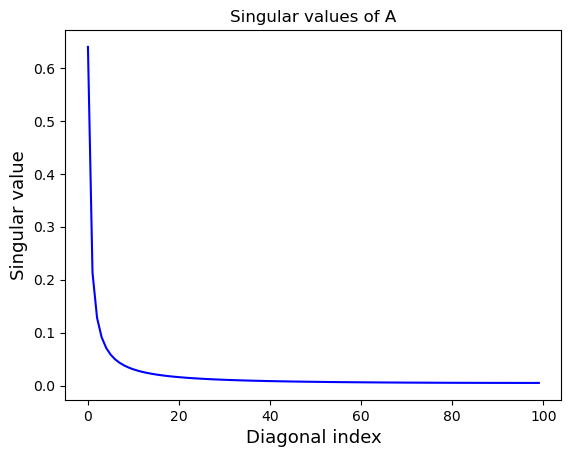

In [12]:
plt.plot(S, color='blue')
plt.xlabel('Diagonal index', fontsize=13)
plt.ylabel('Singular value', fontsize=13)
plt.title('Singular values of A')
plt.show()

In the above plot we can see that the first few singular values are the largest and therefore have the largest effect on the reconstruction of the signal. So if $k$ is too small we might exclude some large singular values, resulting in a less accurate reconstruction of the signal. We saw this in the plot for ex. c, where $k=5$ resulted in a bad reconstruction. 

In ex. b, matrix A was inverted directly and we saw large deviations from the true signal. This closely resembles the truncated $s$ with $k=100$. Including all the small singular values leads to amplified noise and a bad reconstruction of the signal.